In [98]:
import pandas as pd
diabetes_df=pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [99]:
diabetes_df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [100]:
x = diabetes_df.drop('Outcome',axis=1).values
y = diabetes_df['Outcome'].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

In [101]:
from sklearn.neighbors import KNeighborsClassifier
#Create kNN (k Nearest Neighbor) classifier, with k value of 15
knn = KNeighborsClassifier(n_neighbors = 15)
#Fit the classifier to the data
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [102]:
from sklearn.metrics import accuracy_score

In [103]:
print ('accuracy =',metrics.accuracy_score(y_test, y_pred))

accuracy = 0.7402597402597403


In [104]:
pd.DataFrame(data={'Predicted': y_pred, 'Actual': y_test}).head(15)

,Predicted,Actual
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
5,0,0
6,0,0
7,0,0
8,1,1
9,0,0


In [113]:
from sklearn.metrics import recall_score
print ('Recall =',recall_score(y_test, y_pred))

Recall = 0.4444444444444444


In [114]:
from sklearn.metrics import precision_score
print ('Precision =',precision_score(y_test, y_pred))

Precision = 0.7058823529411765


In [115]:
from sklearn.metrics import f1_score
print ('F1-Score =',f1_score(y_test, y_pred))

F1-Score = 0.5454545454545455


In [108]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82       100
           1       0.71      0.44      0.55        54

    accuracy                           0.74       154
   macro avg       0.73      0.67      0.68       154
weighted avg       0.73      0.74      0.72       154



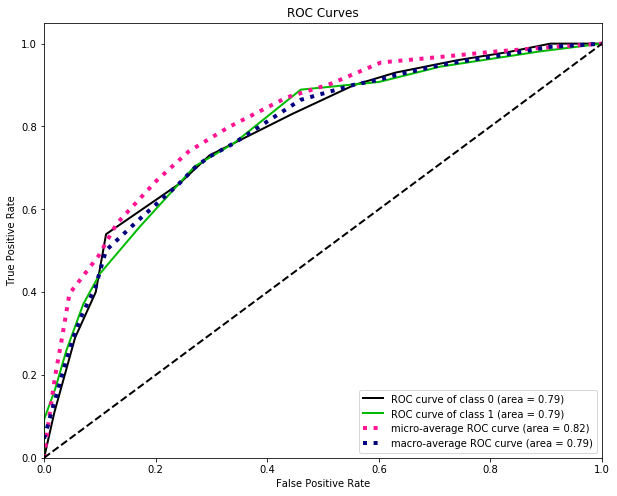

In [109]:
import scikitplot as skplt
y_probas=knn.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(10, 8))

In [118]:
from sklearn.metrics import roc_auc_score
probs = y_probas[:, 1]
print ('ROC AUC =', roc_auc_score(y_test, probs))

ROC AUC = 0.7864814814814814
